# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv("orange_small_churn_data.train")
y = np.fromfile("orange_small_churn_labels.train", dtype=int, sep='\n')
X.head()

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10   ...    \
0   NaN   NaN   NaN   NaN   NaN  3052.0   NaN   NaN   NaN    NaN   ...     
1   NaN   NaN   NaN   NaN   NaN  1813.0   7.0   NaN   NaN    NaN   ...     
2   NaN   NaN   NaN   NaN   NaN  1953.0   7.0   NaN   NaN    NaN   ...     
3   NaN   NaN   NaN   NaN   NaN  1533.0   7.0   NaN   NaN    NaN   ...     
4   NaN   NaN   NaN   NaN   NaN   686.0   7.0   NaN   NaN    NaN   ...     

    Var221   Var222      Var223  Var224  Var225  Var226   Var227  \
0  Al6ZaUT  vr93T2a  LM8l689qOp     NaN     NaN    fKCe  02N6s8f   
1     oslk  6hQ9lNX  LM8l689qOp     NaN    ELof    xb3V     RAYp   
2     zCkv  catzS2D  LM8l689qOp     NaN     NaN    FSa2     ZI9m   
3     oslk  e4lqvY0  LM8l689qOp     NaN     NaN    xb3V     RAYp   
4     oslk  MAz3HNj  LM8l689qOp     NaN     NaN    WqMG     RAYp   

          Var228  Var229  Var230  
0  xwM2aC7IdeMC0     NaN     NaN  
1        55YFVY9    mj86     NaN  
2  ib5G6X1eUxUn6    mj86     NaN  
3  F2FyR07IdsN7I     NaN     NaN  
4  F2FyR07IdsN7I     NaN     NaN  

[5 rows x 230 columns]

In [4]:
y[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

2\. Рассчитайте доли классов `отток` и `не отток`.

In [13]:
churn = float(y[y == 1].size) / float(y.size)
not_churn = float(y[y == -1].size) / float(y.size)
print churn, not_churn

0.0744 0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Немного рассуждений: как мы помним, мерой взаимосвязи для пар признаков, один из которых непрерывный (X1), а другой -категориальный(X2), является просто разность мат.ожиданий: E (X1 | X2 = 1) − E (X1 | X2 = 0)

Непрерывными признаками по условиям задачи являются первые 190 признаков в датасете. Для подсчета корреляции следует заменить NaN на 0.

In [6]:
X.fillna(0, inplace=True)

In [42]:
corr_diff = []

size_c = float(y[y == 1].size)
size_nc = float(y[y == -1].size)

for i in range(190):
    x_col = X.iloc[:,i]
    diff = abs(x_col[y == -1].mean() / size_nc - x_col[y == 1].mean() / size_c)
    corr_diff.append(diff)
    
corr_diff[:10]

[4.542607625637114e-05,
 3.647567435526415e-09,
 0.0009357273492008849,
 8.848816409995089e-07,
 0.9677028028111547,
 0.3201662888020457,
 0.001451353653272413,
 0.0,
 0.00019139658494614006,
 2.719164371581325]

In [44]:
len(corr_diff)

190

Известно, что остальные признаки являются категориальными. Поскольку целевой является бинарным, мы можем отнести его к категориальным и воспользоваться коэффициентом V Крамера для расчета корреляции между ними. Для этого нам необходимо построить таблицу сопряженности.

In [2]:
def get_contingency_matrix(features1, features2):
    cat1 = np.unique(features1)
    cat2 = np.unique(features2)
    X = np.zeros([len(cat1),len(cat2)])
    if(len(cat1) < 2):
        return None
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            n1 = features1[features2 == cat2[j]].values
            X[i,j] = n1[n1 == cat1[i]].size
            
    return X        

In [3]:
import scipy.stats as ss

In [4]:
def get_cramer_coef(contingency_matrix):
    chi2 = ss.chi2_contingency(contingency_matrix)[0]
    n = contingency_matrix.sum()
    return np.sqrt(chi2 / (n*(min(contingency_matrix.shape)-1)))

In [7]:
corr_cat = []

for i in range(190,230):
    contingency_matrix = get_contingency_matrix(X.iloc[:,i], y)
    if (contingency_matrix == None):
        corr_cat.append(0)
    else:
        corr_cat.append(get_cramer_coef(contingency_matrix))
    
len(corr_cat)

/home/sergey/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


40

In [8]:
corr_cat[:10]

[0.013905030394943372,
 0.15124744994612724,
 0.070206596248984107,
 0.019348144748503909,
 0.031671311725115503,
 0.012235099338811926,
 0.082120161041182901,
 0.29259328641845067,
 0.40783117717402118,
 0.52599126441625521]

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

Для удобства из полученных данных создадим массивы формата Значение - Наименование признака

In [119]:
corr_diff_name = zip(corr_diff, X.columns[:190])
sorted(corr_diff_name, reverse=True)[:20]

[(1842.7429835675757, 'Var153'),
 (771.1621331767179, 'Var38'),
 (667.9894609374365, 'Var133'),
 (449.4321387270334, 'Var76'),
 (144.32240763457875, 'Var163'),
 (131.70024522778843, 'Var134'),
 (87.80778818785447, 'Var149'),
 (53.438014217588226, 'Var131'),
 (33.86394794849452, 'Var81'),
 (22.42616635269252, 'Var69'),
 (14.814413404820948, 'Var180'),
 (14.526750406275179, 'Var94'),
 (7.087202812162239, 'Var182'),
 (6.4926112027853025, 'Var125'),
 (5.177653268306402, 'Var154'),
 (4.249734712559502, 'Var177'),
 (3.948704600218828, 'Var53'),
 (3.4807651533743718, 'Var114'),
 (3.3100770613810546, 'Var113'),
 (3.176801875034914, 'Var37')]

In [122]:
top20_name = [n[1] for n in sorted(corr_diff_name, reverse=True)[:20]]
top20_name

['Var153',
 'Var38',
 'Var133',
 'Var76',
 'Var163',
 'Var134',
 'Var149',
 'Var131',
 'Var81',
 'Var69',
 'Var180',
 'Var94',
 'Var182',
 'Var125',
 'Var154',
 'Var177',
 'Var53',
 'Var114',
 'Var113',
 'Var37']

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

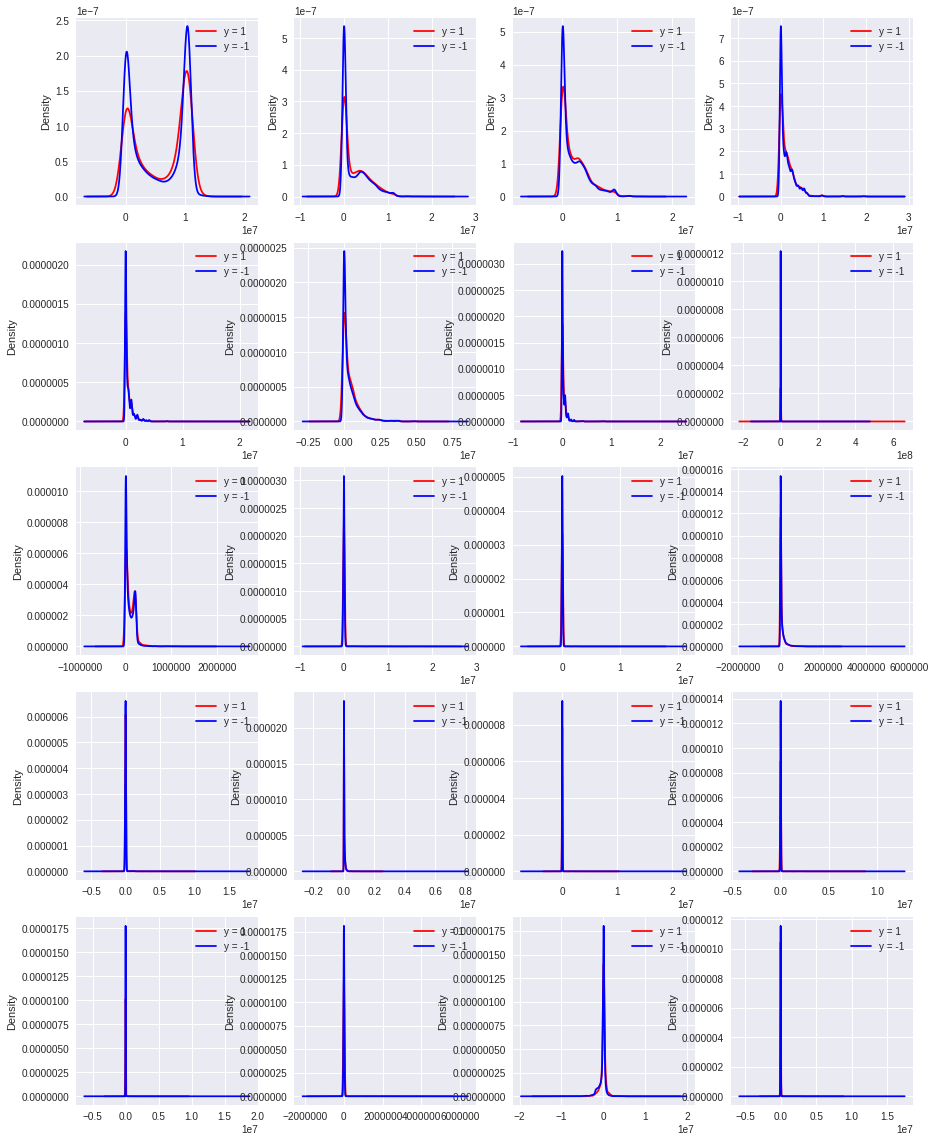

In [131]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
for idx, feature in enumerate(top20_name):
    col_plus_1 = X[feature][y == 1]
    col_minus_1 = X[feature][y == -1]
    col_plus_1.plot(color='r', label="y = 1", subplots=True, kind="kde", legend=True, ax=axes[idx / 4, idx % 4])
    col_minus_1.plot(color='b', label="y = -1", subplots=True, kind="kde", legend=True, ax=axes[idx / 4, idx % 4])

Отображаем объекты в координатах пар признаков

In [132]:
import seaborn as sns

Модифицируем датасет, добавим целевой признак

In [133]:
X_top20 = X[top20_name].copy()
X_top20.insert(20, 'target', y)
X_top20.head()

Var153      Var38     Var133      Var76     Var163     Var134  \
0   2313888.0    82752.0   326915.0   716008.0   599532.0   604276.0   
1   6502680.0  2706120.0  1934460.0  1661128.0   364182.0   349568.0   
2  10569040.0  4698780.0  3148410.0  3025152.0        0.0  1086210.0   
3   9676200.0   864384.0  7066700.0  2642240.0   253284.0   650390.0   
4  10535200.0  4364880.0  3794460.0     1440.0  2851284.0   642816.0   

     Var149  Var131      Var81  Var69   ...       Var94  Var182   Var125  \
0  389396.0     0.0   14599.92    0.0   ...         0.0     0.0      0.0   
1     735.0     0.0   67529.09    0.0   ...     32289.0     0.0  24912.0   
2       0.0     0.0   85266.00    0.0   ...     53388.0     0.0   7218.0   
3       0.0     0.0   74107.20    0.0   ...         0.0     0.0    693.0   
4  554414.0     0.0  171072.90    0.0   ...    106455.0     0.0    468.0   

   Var154  Var177  Var53  Var114     Var113  Var37  target  
0     0.0     0.0    0.0     0.0 -1209960.0    0.0      -1  
1     0.0     0.0    0.0     0.0   417932.0    0.0      -1  
2     0.0     0.0    0.0     0.0  -124655.2    0.0      -1  
3     0.0     0.0    0.0     0.0   378473.6    0.0       1  
4     0.0     0.0    0.0     0.0   142602.4    0.0      -1  

[5 rows x 21 columns]

/home/sergey/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/sergey/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/sergey/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


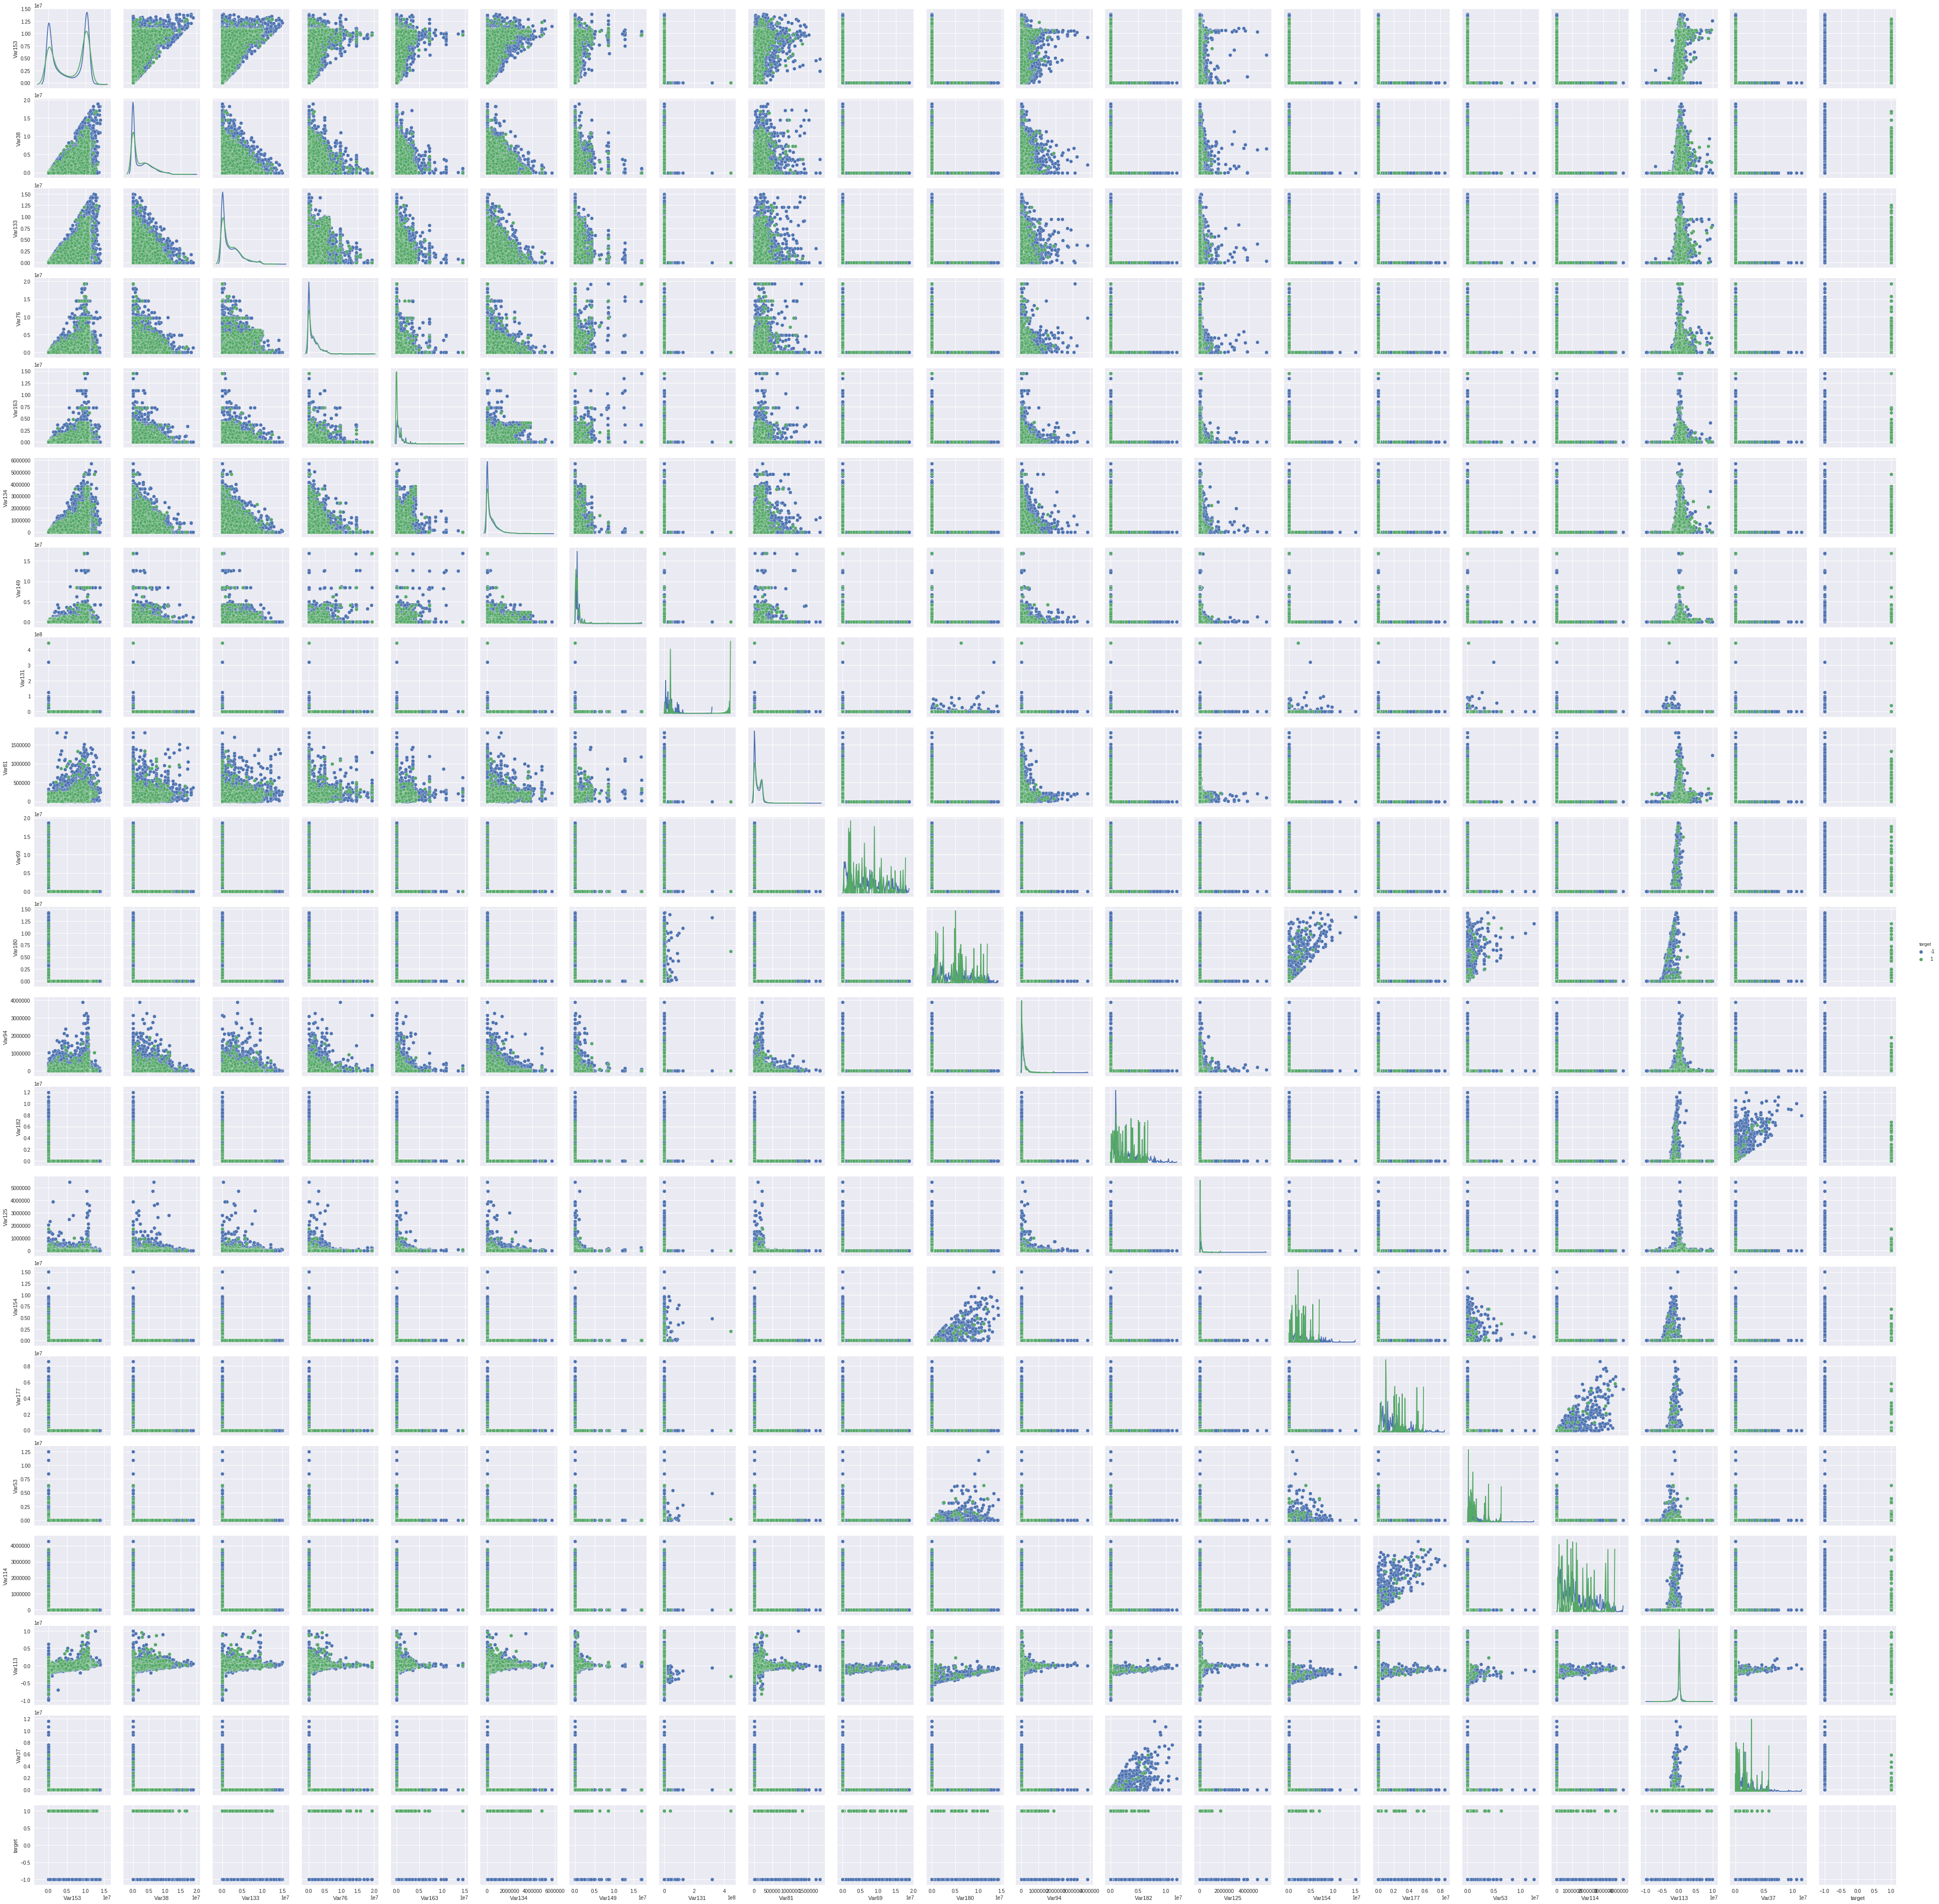

In [134]:
sns.pairplot(X_top20, hue="target", diag_kind="kde")

Если судить по построенным графикам можно предположить, что корреляция напрямую зависит от дисперсии. Для проверки этого предположения построим график. 

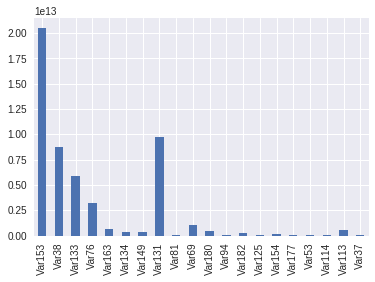

In [149]:
top20_var = X[top20_name].var()
top20_var.plot(kind='bar', stacked=True);

Выводы: в целом прослеживается зависимость корреляции от дисперсии, но есть выбросы

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [151]:
import random
random.seed()

Во время тестов обнаружилась ошибка LinAlgError, поэтому блок следует обернуть в перехватчик исключений

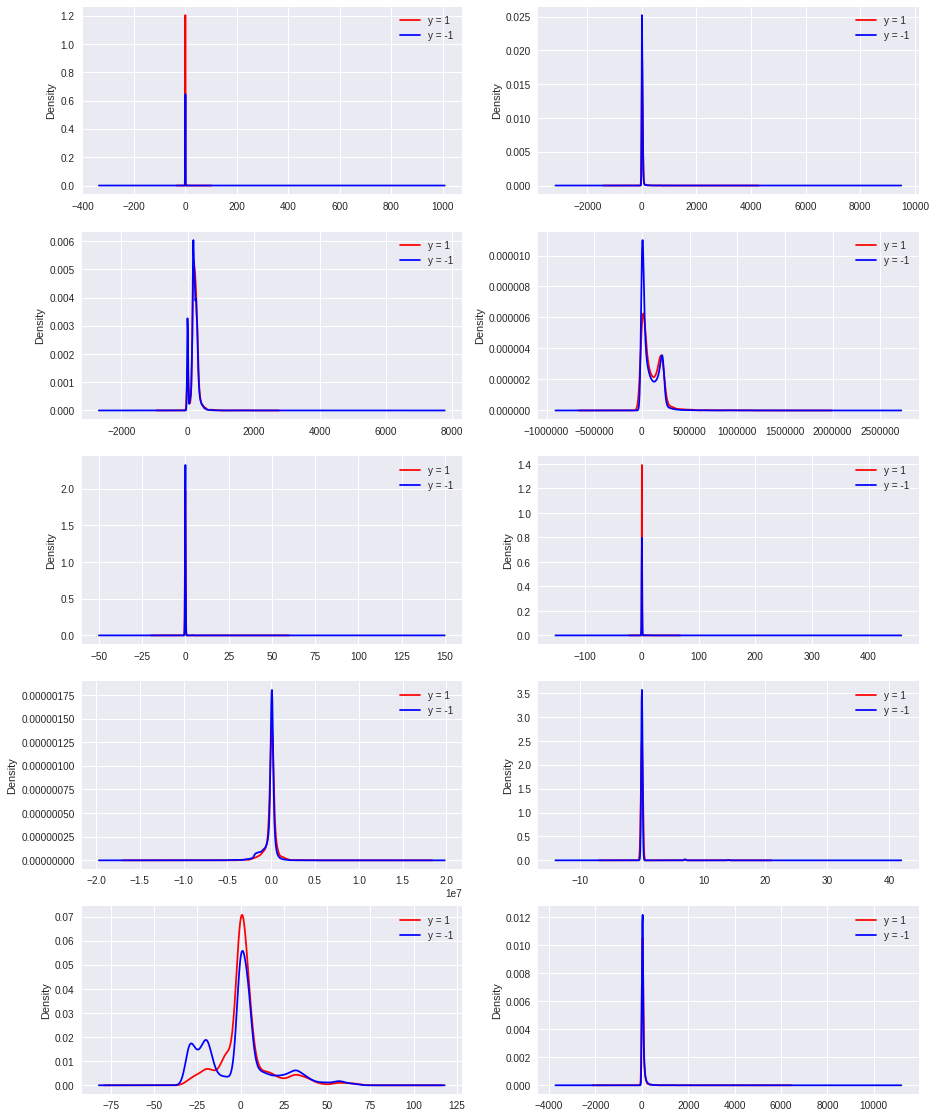

In [158]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
random_features = []
idx = 0

while idx < 10:
    rand_num = random.randint(0, 189)

    col = X.iloc[:, rand_num]
    col_plus_1 = col[y == 1]
    col_minus_1 = col[y == -1]
    try:
        col_plus_1.plot(color='r', label="y = 1", subplots=True, kind="kde", legend=True, ax=axes[idx / 2, idx % 2])
        col_minus_1.plot(color='b', label="y = -1", subplots=True, kind="kde", legend=True, ax=axes[idx / 2, idx % 2])
        idx+=1
        random_features.append(rand_num)
    except np.linalg.linalg.LinAlgError:
        print "LinAlgError matrix #: ", rand_num

In [159]:
random_features

[120, 82, 27, 80, 136, 177, 112, 86, 125, 108]

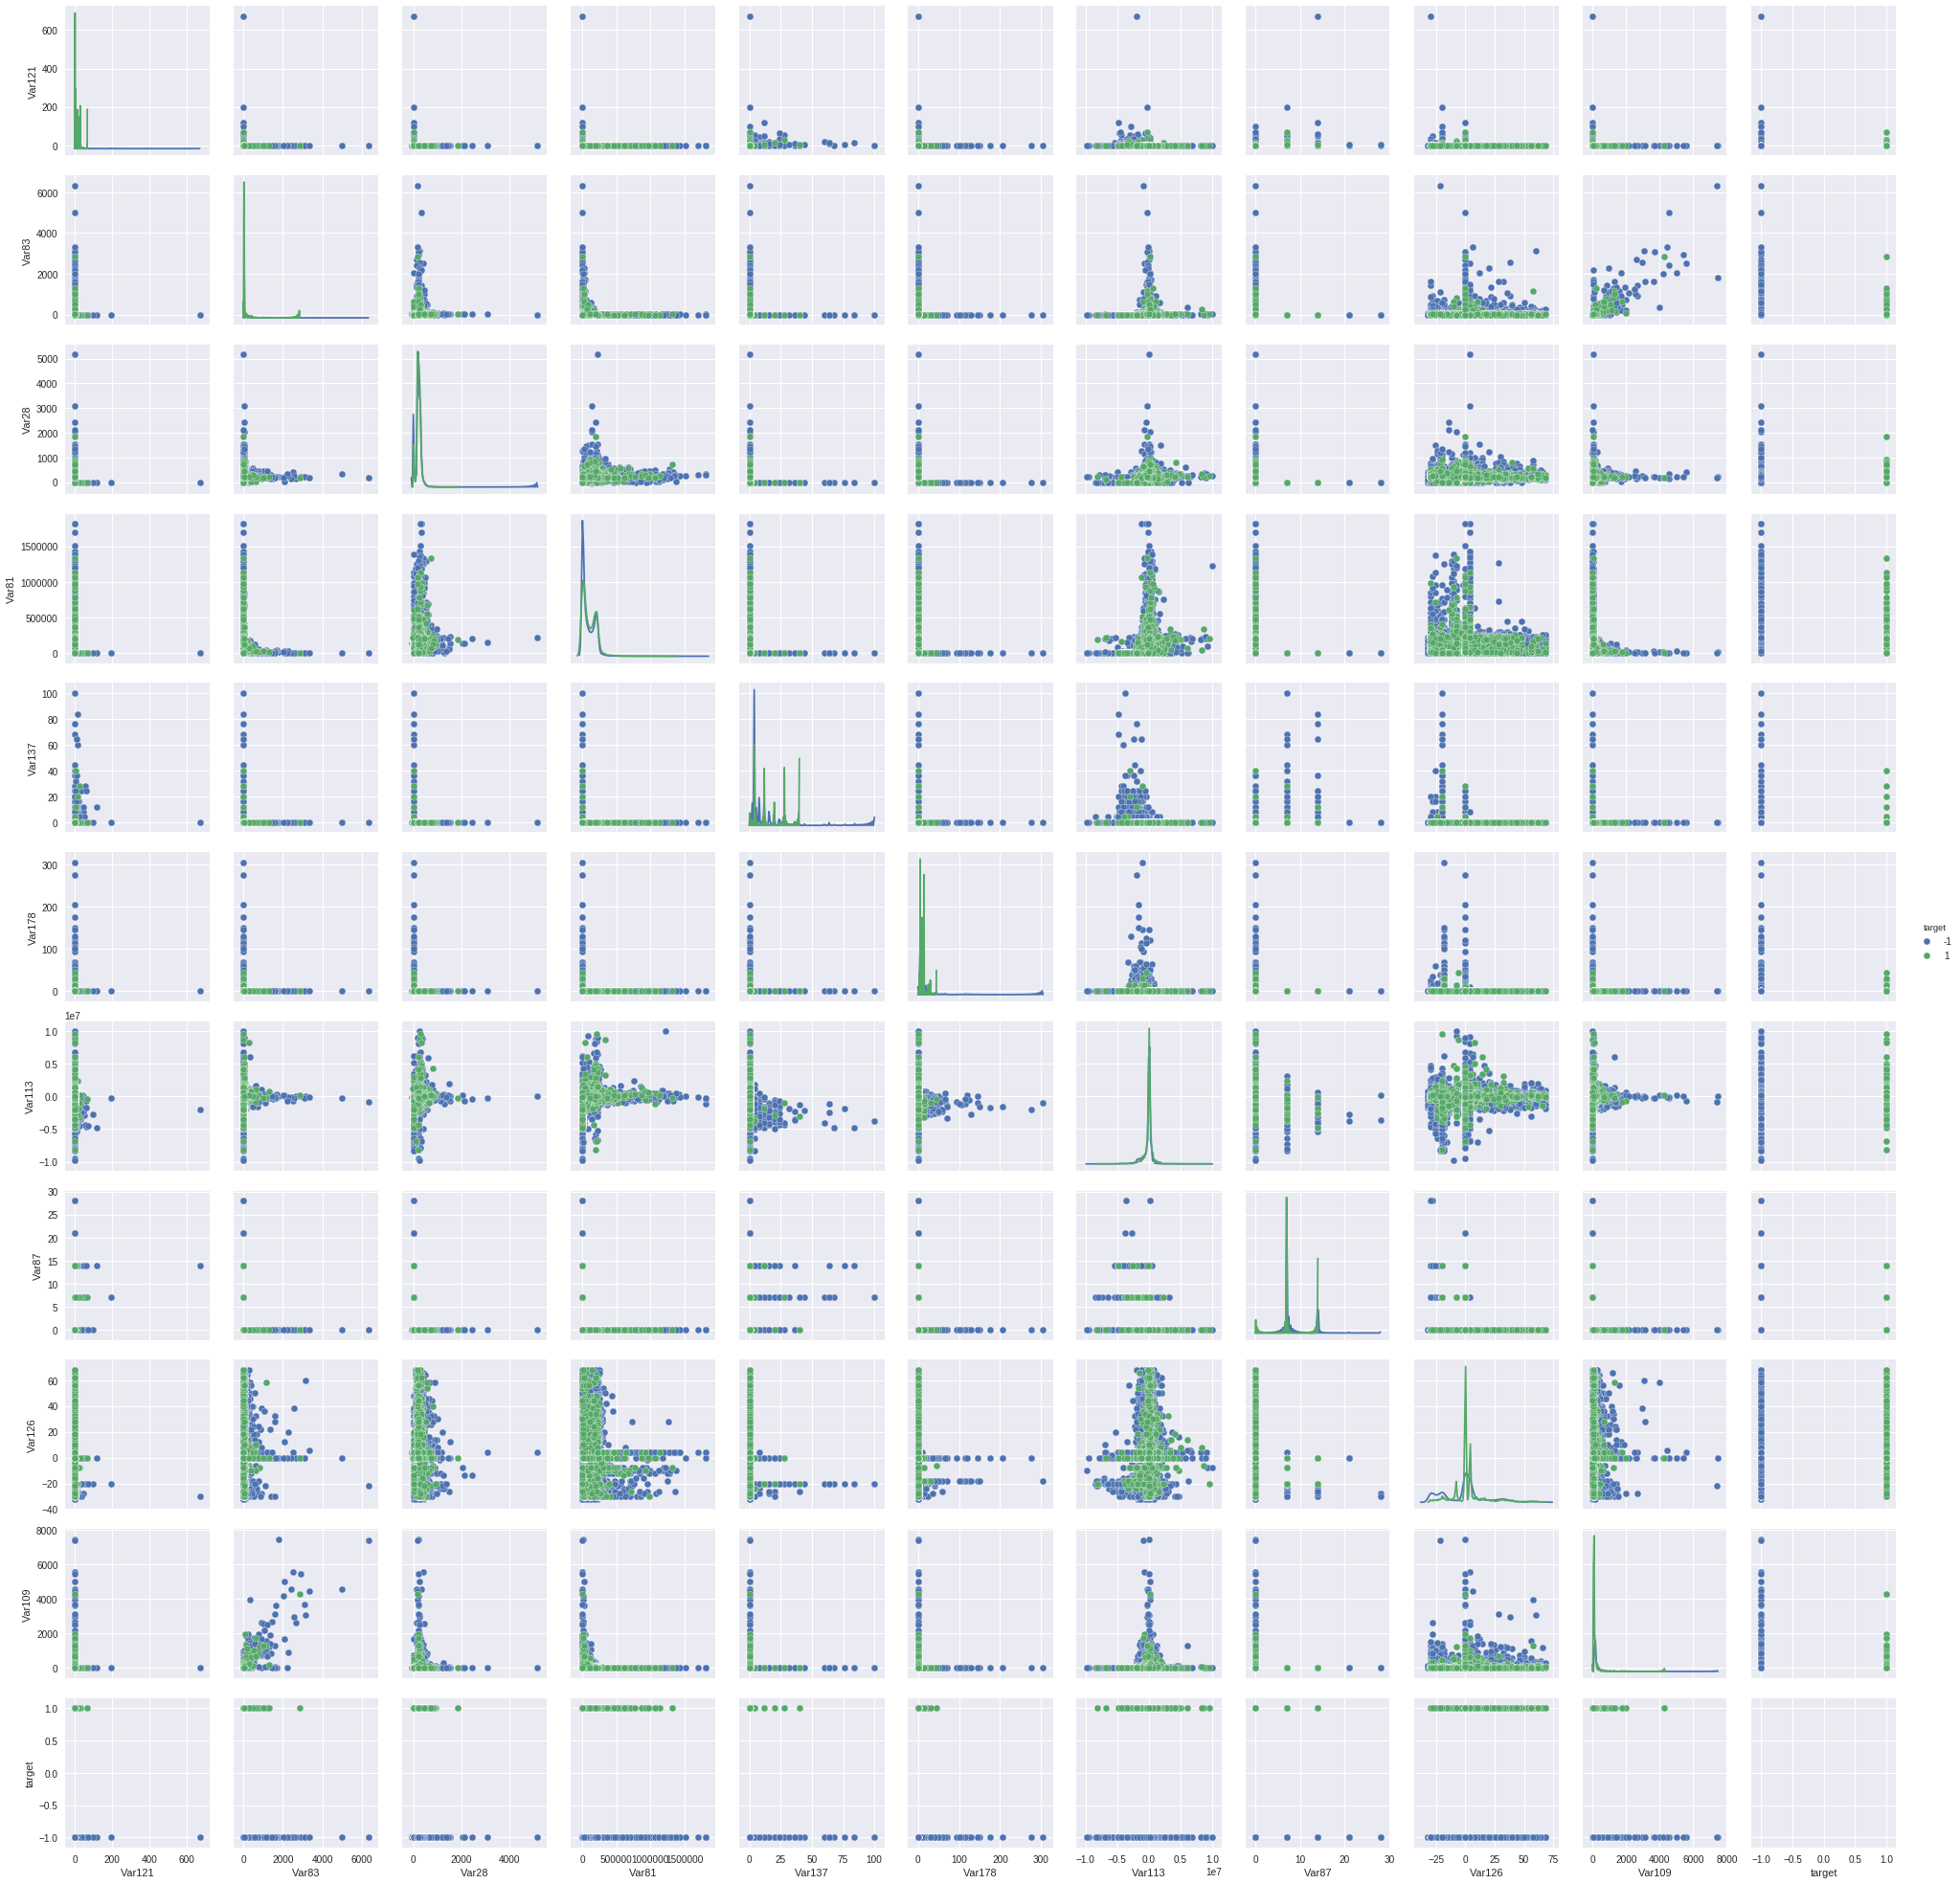

In [160]:
X_rand = X.iloc[:, random_features].copy()
X_rand.insert(10, 'target', y)
sns.pairplot(X_rand, hue="target", diag_kind="kde")

Посмотрим, на всякий пожарный, на дисперсию

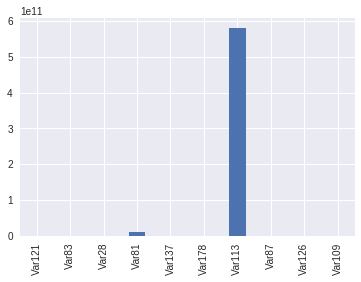

In [161]:
random_var = X.iloc[:, random_features].var()
random_var.plot(kind='bar', stacked=True);

Никакой закономерности не наблюдается

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [162]:
sorted(corr_diff_name)[:10]

[(0.0, 'Var141'),
 (0.0, 'Var15'),
 (0.0, 'Var167'),
 (0.0, 'Var169'),
 (0.0, 'Var175'),
 (0.0, 'Var185'),
 (0.0, 'Var20'),
 (0.0, 'Var31'),
 (0.0, 'Var32'),
 (0.0, 'Var39')]

Поскольку среди данных 10 признаков тоже могут попадаться вырожденные матрицы, организуем процесс построения графиков так же, как и в предыдущем случае - перебором с исключением

In [185]:
last_names =  [n[1] for n in sorted(corr_diff_name)]
last_names[:10]

['Var141',
 'Var15',
 'Var167',
 'Var169',
 'Var175',
 'Var185',
 'Var20',
 'Var31',
 'Var32',
 'Var39']

In [186]:
XC = X.copy()
XC.head()

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10   ...    \
0   0.0   0.0   0.0   0.0   0.0  3052.0   0.0   0.0   0.0    0.0   ...     
1   0.0   0.0   0.0   0.0   0.0  1813.0   7.0   0.0   0.0    0.0   ...     
2   0.0   0.0   0.0   0.0   0.0  1953.0   7.0   0.0   0.0    0.0   ...     
3   0.0   0.0   0.0   0.0   0.0  1533.0   7.0   0.0   0.0    0.0   ...     
4   0.0   0.0   0.0   0.0   0.0   686.0   7.0   0.0   0.0    0.0   ...     

    Var221   Var222      Var223  Var224  Var225  Var226   Var227  \
0  Al6ZaUT  vr93T2a  LM8l689qOp       0       0    fKCe  02N6s8f   
1     oslk  6hQ9lNX  LM8l689qOp       0    ELof    xb3V     RAYp   
2     zCkv  catzS2D  LM8l689qOp       0       0    FSa2     ZI9m   
3     oslk  e4lqvY0  LM8l689qOp       0       0    xb3V     RAYp   
4     oslk  MAz3HNj  LM8l689qOp       0       0    WqMG     RAYp   

          Var228  Var229  Var230  
0  xwM2aC7IdeMC0       0     0.0  
1        55YFVY9    mj86     0.0  
2  ib5G6X1eUxUn6    mj86     0.0  
3  F2FyR07IdsN7I       0     0.0  
4  F2FyR07IdsN7I       0     0.0  

[5 rows x 230 columns]

LinAlgError matrix #:  Var141
LinAlgError matrix #:  Var15
LinAlgError matrix #:  Var167
LinAlgError matrix #:  Var169
LinAlgError matrix #:  Var175
LinAlgError matrix #:  Var185
LinAlgError matrix #:  Var20
LinAlgError matrix #:  Var31
LinAlgError matrix #:  Var32
LinAlgError matrix #:  Var39
LinAlgError matrix #:  Var42
LinAlgError matrix #:  Var48
LinAlgError matrix #:  Var52
LinAlgError matrix #:  Var55
LinAlgError matrix #:  Var79
LinAlgError matrix #:  Var8
LinAlgError matrix #:  Var138
LinAlgError matrix #:  Var2
LinAlgError matrix #:  Var29
LinAlgError matrix #:  Var90
LinAlgError matrix #:  Var67
LinAlgError matrix #:  Var27
LinAlgError matrix #:  Var122
LinAlgError matrix #:  Var49


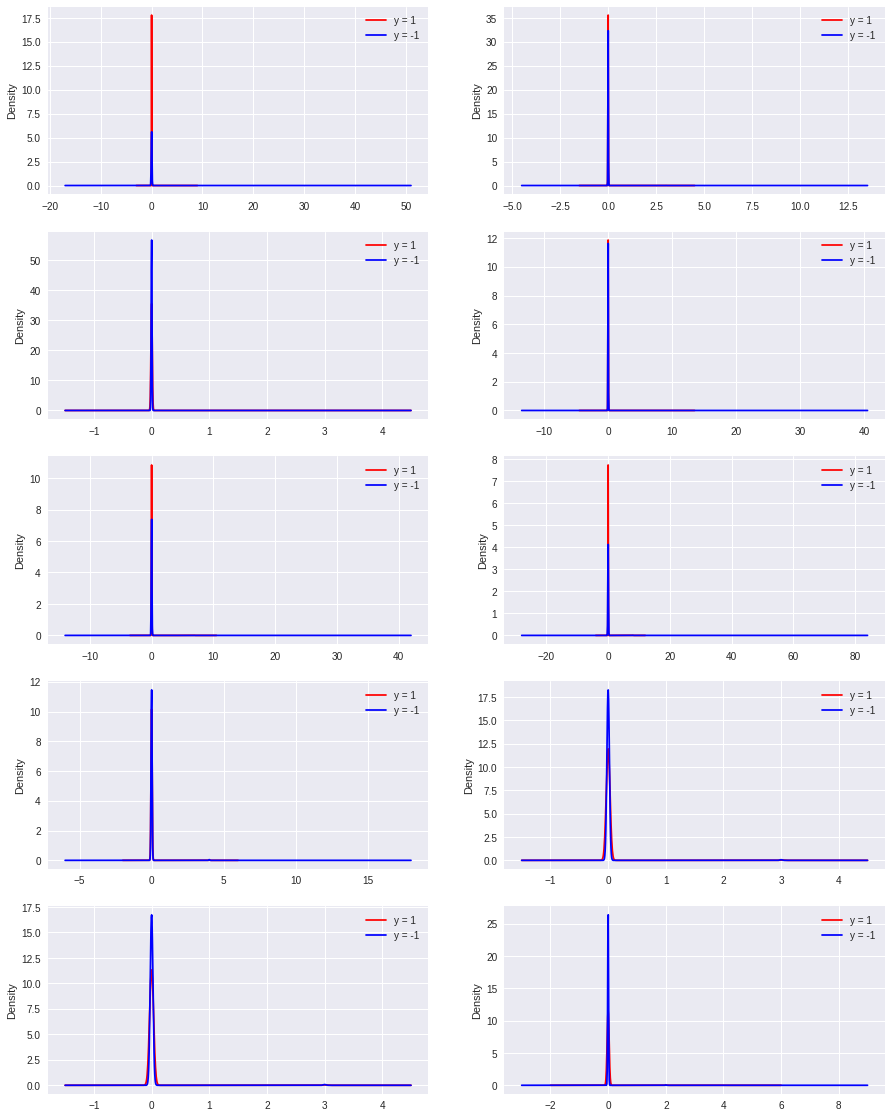

In [187]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
last_features = []
idx = 0

while idx < 10:
    n = last_names.pop(0)
    col = XC[n]
    col_plus_1 = col[y == 1]
    col_minus_1 = col[y == -1]
    try:
        col_plus_1.plot(color='r', label="y = 1", subplots=True, kind="kde", legend=True, ax=axes[idx / 2, idx % 2])
        col_minus_1.plot(color='b', label="y = -1", subplots=True, kind="kde", legend=True, ax=axes[idx / 2, idx % 2])
        idx+=1
        last_features.append(n)
    except np.linalg.linalg.LinAlgError:
        print "LinAlgError matrix #: ", n

In [188]:
last_features

['Var14',
 'Var26',
 'Var116',
 'Var4',
 'Var100',
 'Var34',
 'Var142',
 'Var118',
 'Var130',
 'Var173']

/home/sergey/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/sergey/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


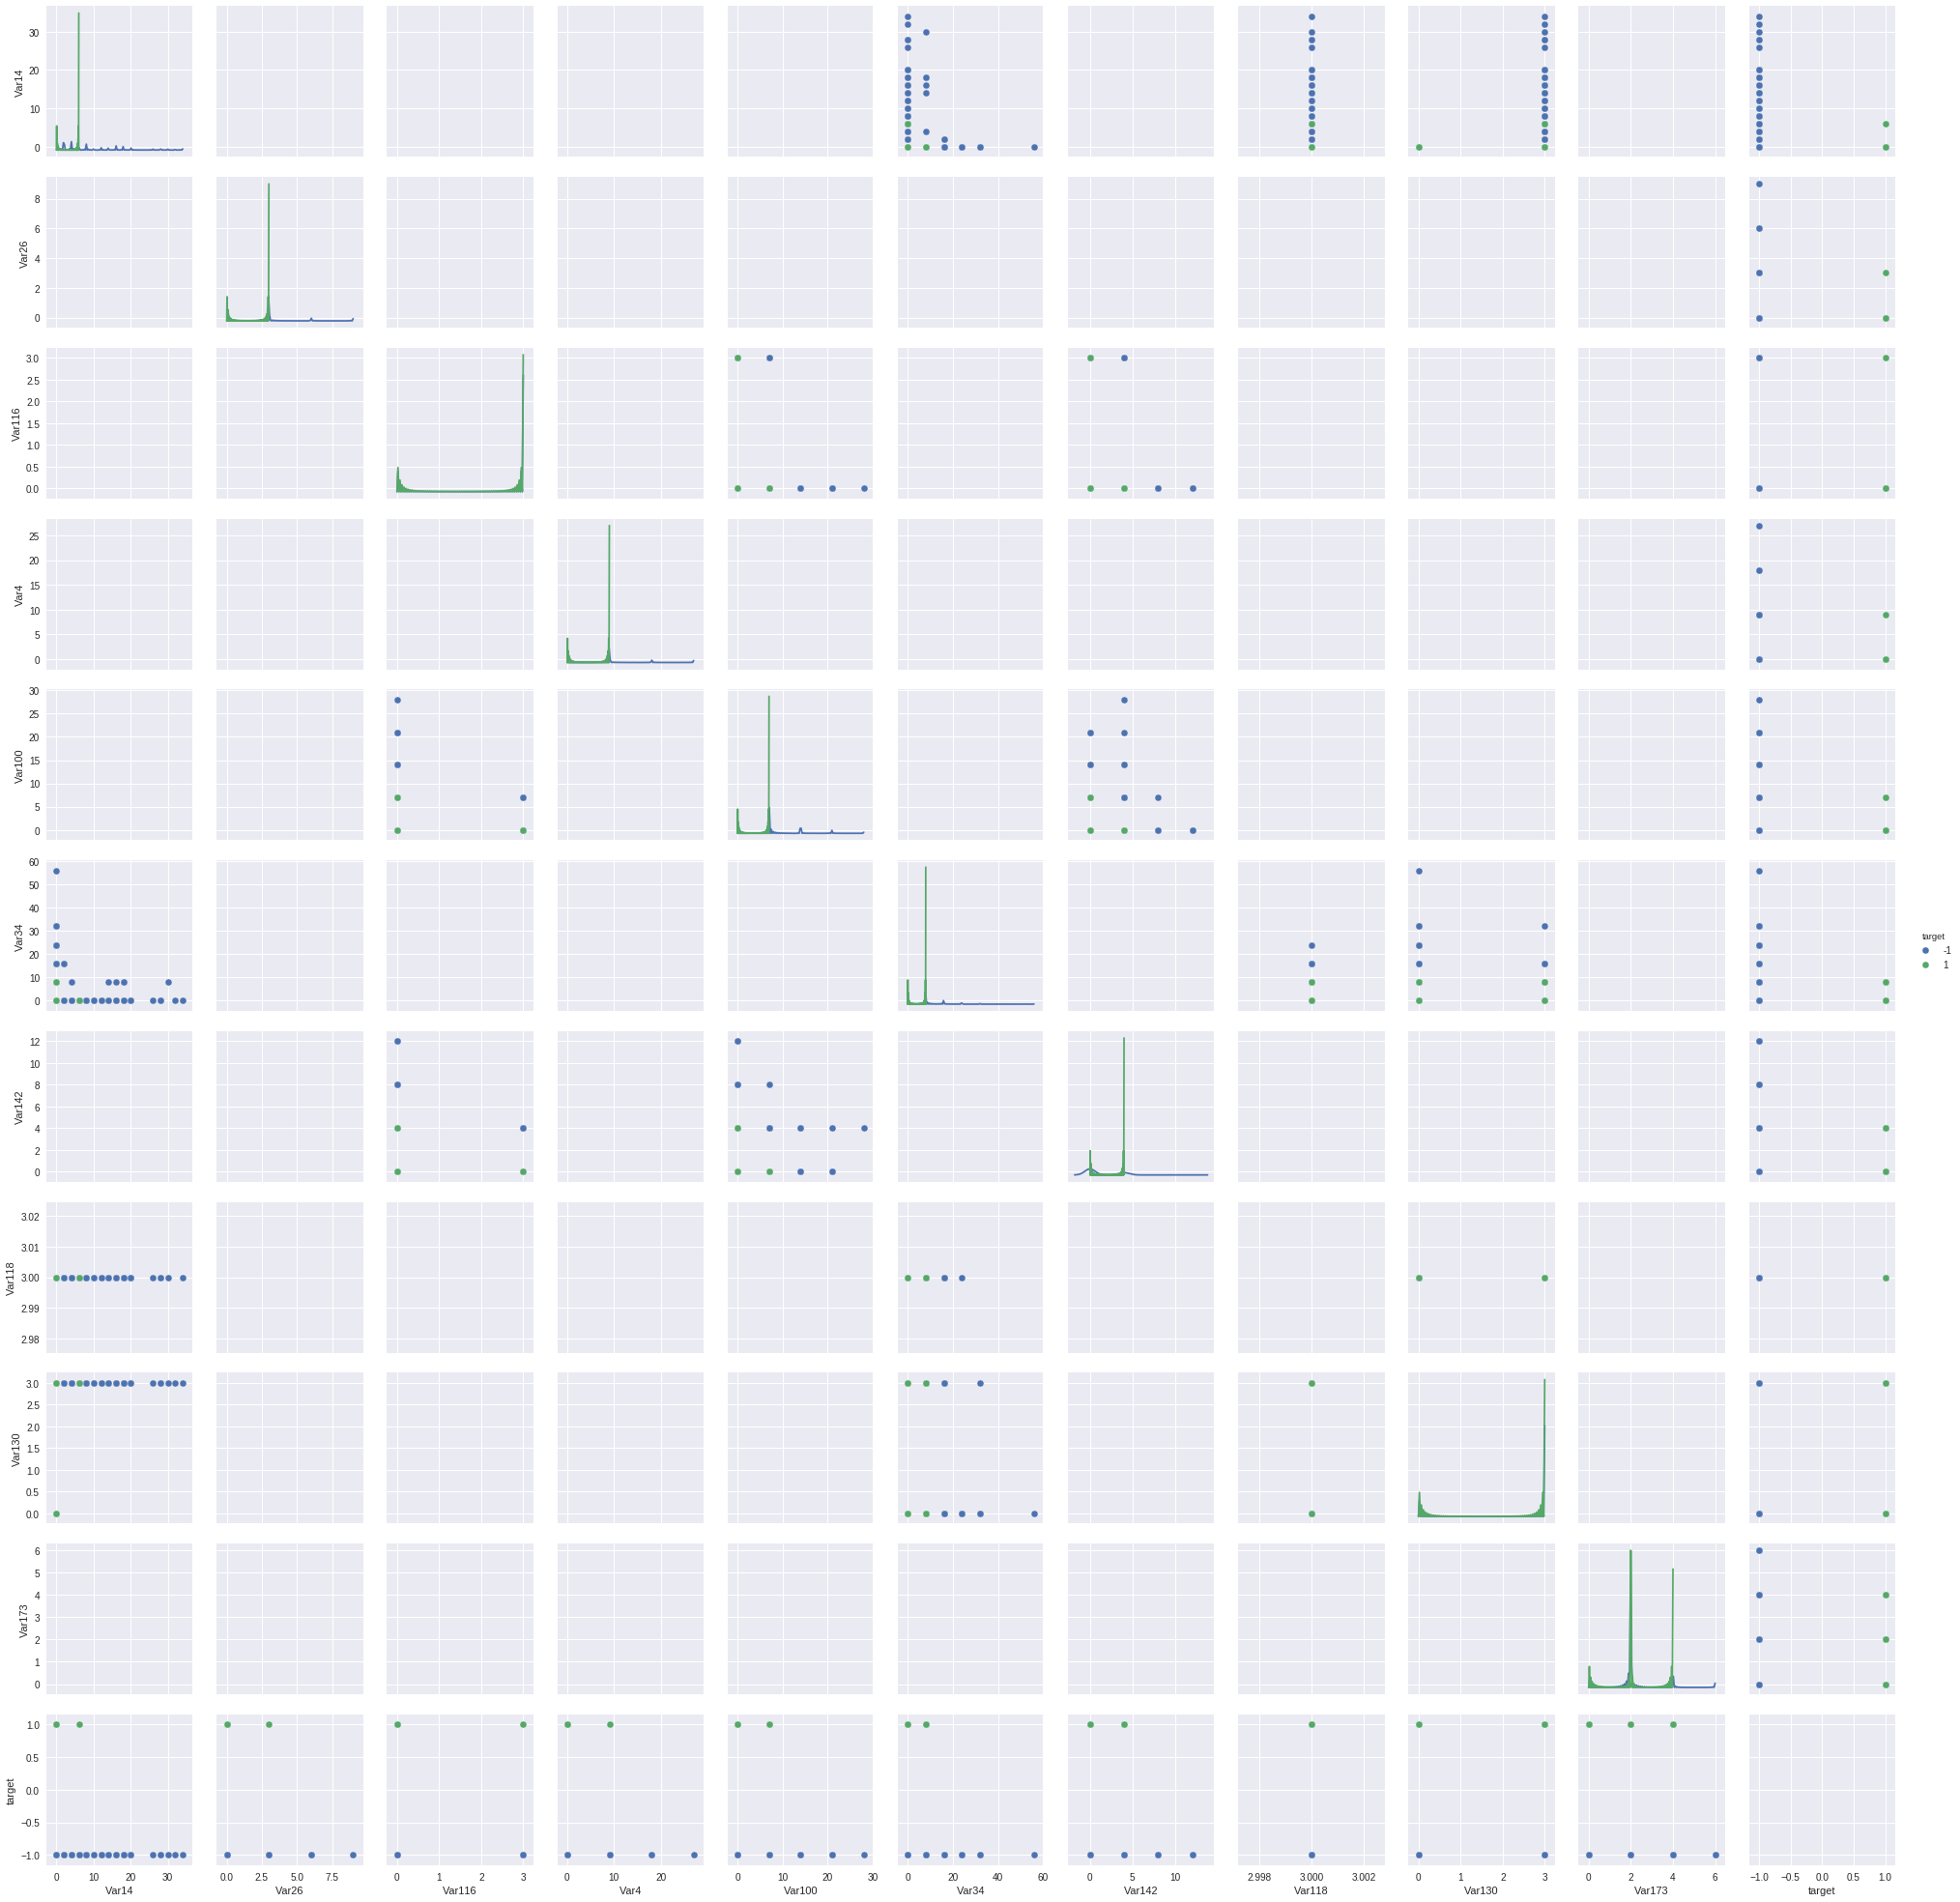

In [196]:
X_last = X[last_features].copy()
X_last.insert(10, 'target', y)
sns.pairplot(X_last, hue="target", diag_kind="kde")

В заключение посмотрим на дисперсию

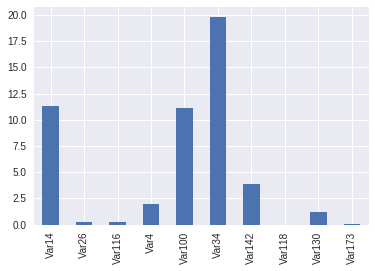

In [197]:
last_var = X[last_features].var()
last_var.plot(kind='bar', stacked=True);

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [9]:
corr_cat_name = zip(corr_cat, X.columns[190:230])
sorted(corr_cat_name, reverse=True)[:20]

[(0.52986260512218375, 'Var217'),
 (0.52599126441625521, 'Var214'),
 (0.52599126441625521, 'Var200'),
 (0.40783117717402118, 'Var199'),
 (0.36343287292663429, 'Var202'),
 (0.29259328641845067, 'Var222'),
 (0.29259328641845067, 'Var220'),
 (0.29259328641845067, 'Var198'),
 (0.22894003457385523, 'Var216'),
 (0.15124744994612724, 'Var192'),
 (0.10175630348119198, 'Var218'),
 (0.087020127729270841, 'Var212'),
 (0.085054492582019067, 'Var206'),
 (0.082120161041182901, 'Var197'),
 (0.07557545823201052, 'Var228'),
 (0.072557849012233999, 'Var205'),
 (0.070206596248984107, 'Var193'),
 (0.069023300553773259, 'Var204'),
 (0.062484746928285713, 'Var229'),
 (0.058275604638053723, 'Var207')]

Посмотрим на количество категорий в признаках

In [16]:
for n in sorted(corr_cat_name, reverse=True):
    print n[1], len(X[n[1]].unique())

Var217 12471
Var214 13298
Var200 13298
Var199 4401
Var202 5543
Var222 3891
Var220 3891
Var198 3891
Var216 1819
Var192 355
Var218 3
Var212 78
Var206 22
Var197 221
Var228 30
Var205 4
Var193 50
Var204 100
Var229 5
Var207 14
Var225 4
Var227 7
Var221 7
Var210 6
Var226 23
Var211 2
Var195 23
Var219 23
Var194 4
Var201 3
Var213 2
Var203 6
Var191 2
Var196 4
Var208 3
Var223 5
Var224 2
Var215 2
Var230 1
Var209 1


Очевидно, что для построения гистограмм нам требуется отобрать те признаки, где количество категорий является разумным. Например возьмем верхней границей 15, а нижней 2.

In [28]:
top5_cat = [n[1] for n in sorted(corr_cat_name, reverse=True) if len(X[n[1]].unique()) < 15 and len(X[n[1]].unique()) > 1][:5]
top5_cat

['Var218', 'Var205', 'Var229', 'Var207', 'Var225']

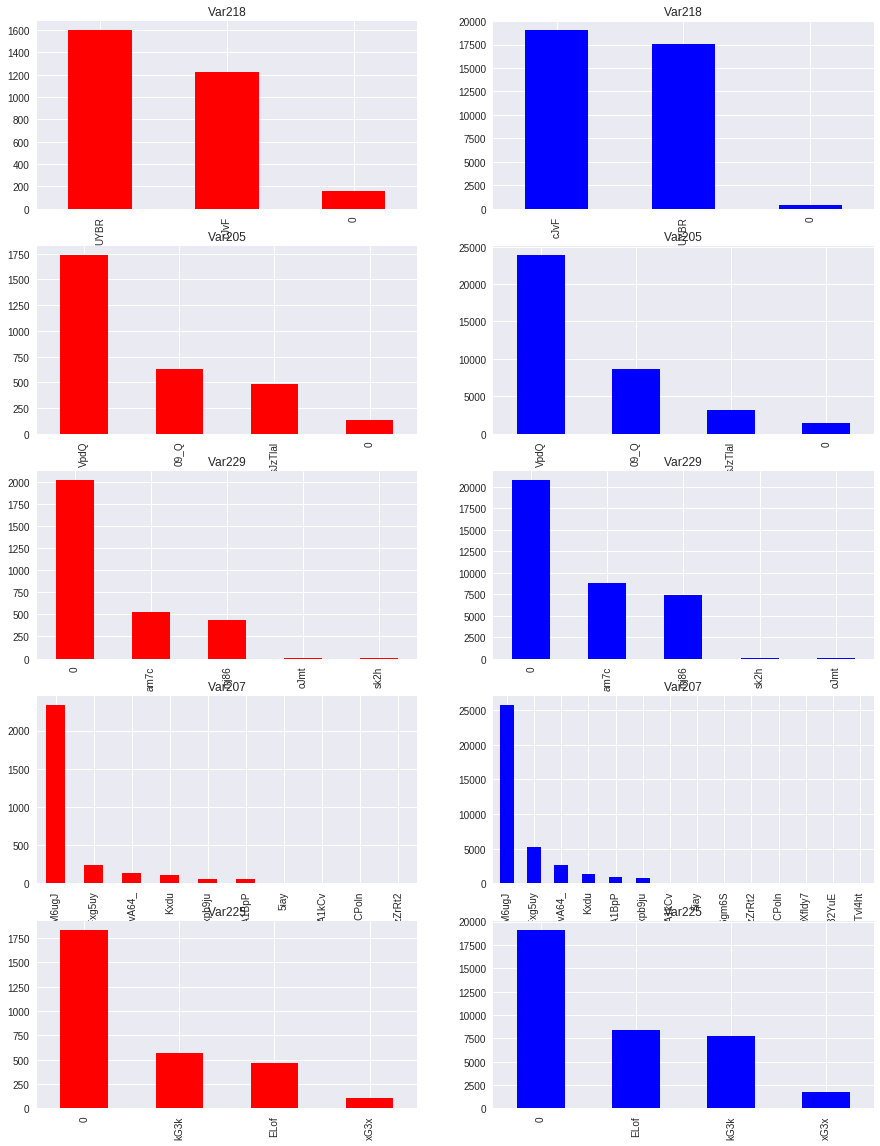

In [37]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for idx, features in enumerate(top5_cat):
    col_plus_1 = X[features][y == 1]
    col_minus_1 = X[features][y == -1]
    col_plus_1.value_counts().plot(kind='bar', color='r', subplots=True, ax=axes[idx, 0])
    col_minus_1.value_counts().plot(kind='bar', color='b', subplots=True, ax=axes[idx, 1])

Для последних 5 записей

In [38]:
last5_cat = [n[1] for n in sorted(corr_cat_name) if len(X[n[1]].unique()) < 15 and len(X[n[1]].unique()) > 1][:5]
last5_cat

['Var215', 'Var224', 'Var223', 'Var208', 'Var196']

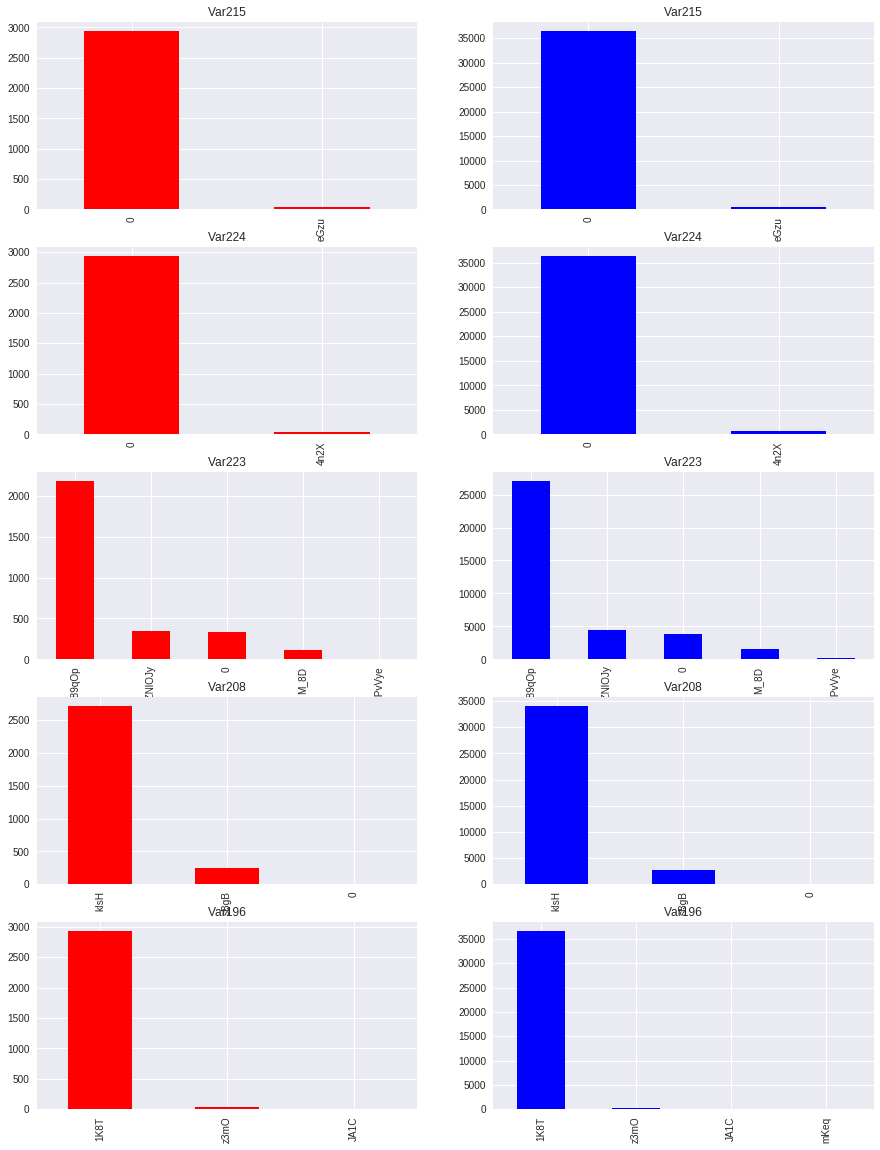

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for idx, features in enumerate(last5_cat):
    col_plus_1 = X[features][y == 1]
    col_minus_1 = X[features][y == -1]
    col_plus_1.value_counts().plot(kind='bar', color='r', subplots=True, ax=axes[idx, 0])
    col_minus_1.value_counts().plot(kind='bar', color='b', subplots=True, ax=axes[idx, 1])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Выборка несбалансирована.

Из закономерностей можно отметить, что наиболее коррелирующие признаки имеют большую дисперсию и зависимость эта прямая - т.е., чем больше разброс значений, тем больше корреляция.

Практически бесполезные признаки имеют близкую к нулю дисперсию. Можно предположить, что это из-за большого количества пропусков в изначальных данных, которые пришлось заменить на 0.

Из категориальных признаков более всего коррелируют те, которые содержат очень большое количество категорий, т.е. ситуация схожа с числовыми.

Наибольшее влияние оказывают: 'Var153', 'Var38', 'Var133', 'Var76', 'Var217', 'Var214', 'Var200', 'Var199', 'Var202'

Наименьшее: 
Практически нулевые признаки: Var141
Var15
Var167
Var169
Var175
Var185
Var20
Var31
Var32
Var39
Var42
Var48
Var52
Var55
Var79
Var8
Var138
Var2
Var29
Var90
Var67
Var27
Var122
Var49
Из категориальных все, которые имеют не больше одной категории, к примеру:
Var215
Var230
Var209

Отбор признаков полезен для построения модели